# ¿Qué es k-NN?

k-Nearest Neighbors es un algoritmo basado en instancias, que no aprende una función explícita durante el entrenamiento. En vez de eso:

Para predecir la etiqueta de un nuevo punto, simplemente busca los k puntos más cercanos en el conjunto de entrenamiento.

Luego, vota (clasificación) o promedia (regresión) las etiquetas de esos vecinos.

## Importar Librerias

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Circle

## Generar un dataset sintético
Datos artificiales que simulan problemas de clasificación.

- n_samples=200: Genera 200 ejemplos o filas (puntos de datos).
- n_features=2:Cada ejemplo tiene 2 características (columnas), es decir, X.shape = (200, 2).
- n_informative=2: Las 2 características realmente contienen información útil para separar las clases.
- n_redundant=0: No se incluyen características redundantes (combinaciones lineales de las informativas).
- n_clusters_per_class=1: Cada clase se genera a partir de 1 grupo o clúster (simplifica la visualización).
- random_state=42: Semilla para que el resultado sea reproducible (siempre se generan los mismos datos).


In [2]:
# Generar 200 muestras de 2 caracteristicas, ambas información útil, no redundante, con 1 cluster por clase.
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
#X = X + np.random.normal(loc=0.0, scale=0.5, size=X.shape)

## Visualización de los datos

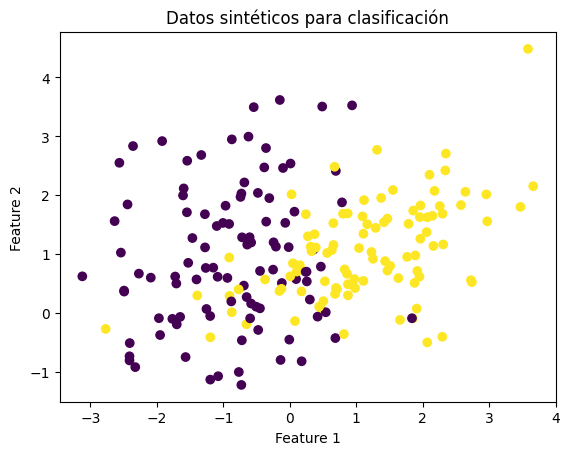

In [3]:
# Generar grafica de dispersión 
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Datos sintéticos para clasificación")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Dividir en entrenamiento y prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Establecer el Pipeline de estandarización y clasificación

In [11]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=7))
])

## Entrenar el modelo k-NN

In [12]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

## Evaluar

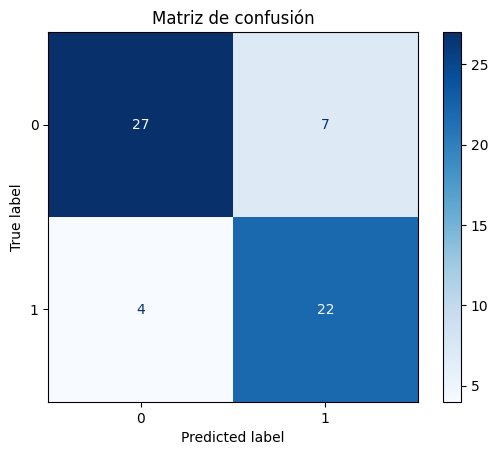

In [13]:
y_pred = pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Matriz de confusión")
plt.grid(False)
plt.show()

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


## Visualización de la frontera de decisión

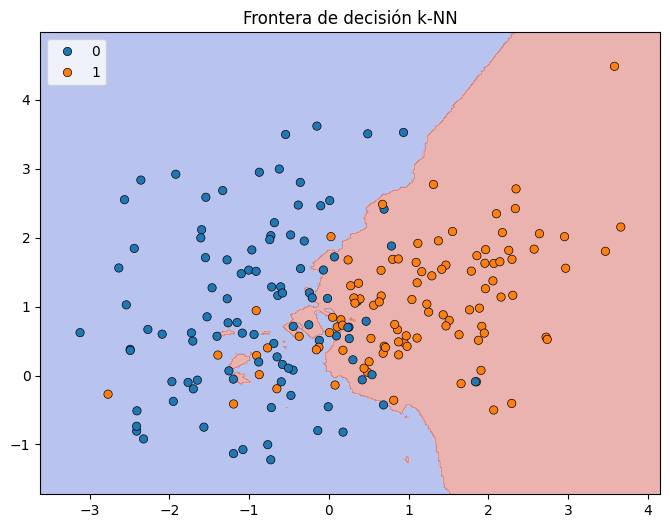

In [15]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor='k')
plt.title("Frontera de decisión k-NN")
plt.show()


## Visualización del proceso de votación para un nuevo punto

In [16]:
index = 0
punto_test = X_test[index].reshape(1, -1)
distancias = np.linalg.norm(X_train - X_test[index], axis=1)
indices_vecinos = distancias.argsort()[:5]

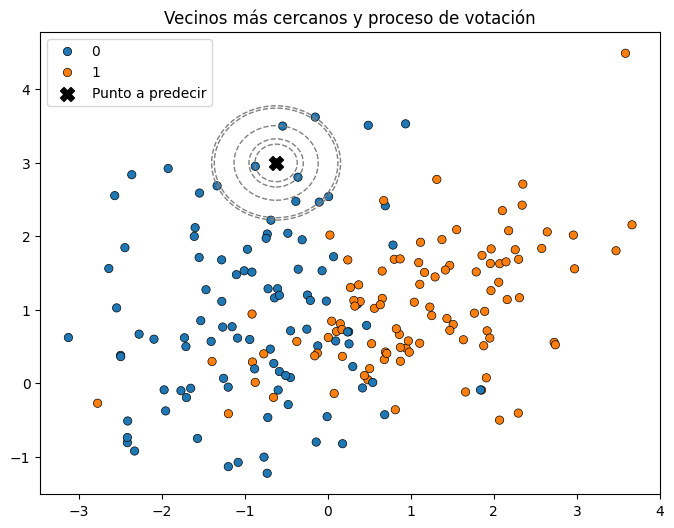

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor='k')
plt.scatter(*punto_test[0], color='black', label='Punto a predecir', s=100, marker='X')
for i in indices_vecinos:
    vecino = X_train[i].reshape(1, -1)
    circulo = Circle(punto_test[0], radius=np.linalg.norm(punto_test - vecino), fill=False, color='gray', linestyle='--', linewidth=1)
    plt.gca().add_patch(circulo)
plt.title("Vecinos más cercanos y proceso de votación")
plt.legend()
plt.show()

## Ejercicios:
- Cambiar el valor de k y observar cómo cambia la frontera y las métricas.
- Probar con el dataset Iris usando solo 2 características.
- Agregar ruido al dataset y observar el impacto en la clasificación.

## Dataset Iris

In [123]:
from sklearn.datasets import load_iris

In [124]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [126]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

In [127]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [128]:
y_pred = pipe.predict(X_test)

In [129]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2}")

Accuracy: 1.0


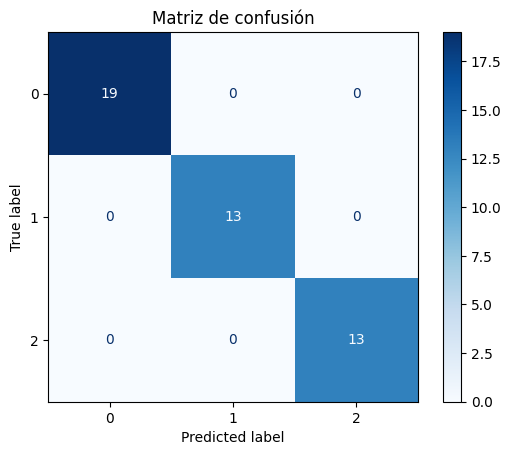

In [130]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Matriz de confusión")
plt.grid(False)
plt.show()

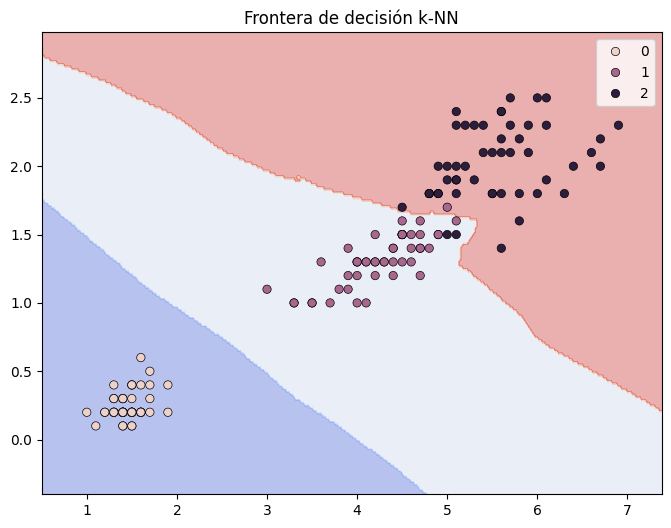

In [131]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor='k')
plt.title("Frontera de decisión k-NN")
plt.show()
